# **1. Importing necessary libraries:**

Uploading the CSV file into Google Colab and identifying the column sets.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random


In [ ]:
USING_COLAB = True
if USING_COLAB:
  from google.colab import drive
  drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_dataset = pd.read_csv('/content/drive/MyDrive/University of Greenwich/Applied Machine Learning/comp1804_coursework_dataset_23-24.csv')

In [ ]:
print("Columns:")
for column in X_dataset.columns:
    print(column)

Columns:
par_id
paragraph
has_entity
lexicon_count
difficult_words
last_editor_gender
category
text_clarity


# **2. Data exploration**

In this section, I will be reformatting the columns in the CSV named 'X'. This includes: removing duplicated values, reformatting content, removing missing data.

## **1. Number of duplicated par_ids with the same paragraph content.**

### **First, identifying how many duplicates are in the 'par_id' column:**

In [ ]:
num_duplicates_par_id = X_dataset.duplicated(subset=['par_id']).sum()

#  Print the total number of duplicates in the 'par_id' column
print(f"Total number of duplicates in 'par_id' column: {num_duplicates_par_id}")

Total number of duplicates in 'par_id' column: 215


### **Dropping all duplicates in the 'par_id' column:**

In [ ]:
# Drop duplicates in the 'par_id' column
X_dataset.drop_duplicates(subset=['par_id'], inplace=True)

# Calculate the total number of duplicates in the 'par_id' column
num_duplicates_par_id = X_dataset.duplicated(subset=['par_id']).sum()

# Print the total number of duplicates in the 'par_id' column
print(f"Total number of duplicates in 'par_id' column after dropping duplicates: {num_duplicates_par_id}")


Total number of duplicates in 'par_id' column after dropping duplicates: 0


### **Checking to see if there any duplicated par_ids with the same paragraph content:**

In [ ]:
duplicates_par_id = X_dataset[X_dataset.duplicated(subset=['par_id'], keep=False)]

total_duplicates_with_same_paragraph = 0

# Filter the duplicates with the same paragraph content
for par_id, group in duplicates_par_id.groupby('par_id'):
    if len(group['paragraph'].unique()) == 1:
        total_duplicates_with_same_paragraph += 1

# Print the total number of par_ids that are duplicated and have the same paragraph content
print(f"Total number of duplicated par_ids with the same paragraph content: {total_duplicates_with_same_paragraph}")

Total number of duplicated par_ids with the same paragraph content: 0


## **2. Duplicated paragraph content below.**

### **Identifying how many duplicates are still in the 'paragraph' column:**

In [ ]:
duplicates_paragraph = X_dataset[X_dataset.duplicated(subset=['paragraph'], keep=False)]

print(f"Total number of duplicates in 'paragraph': {len(duplicates_paragraph)}")

Total number of duplicates in 'paragraph': 240


### **Identifying how many of those duplicates are integers:**

In [ ]:
count_minus_one = (X_dataset['paragraph'] == '-1').sum()
print("Number of occurrences of '-1' in the 'paragraph' column:", count_minus_one)


Number of occurrences of '-1' in the 'paragraph' column: 42


### **Dropping all duplicates in the 'paragraph' column:**

In [ ]:
# Drop duplicates based on the 'paragraph' column
X_dataset.drop_duplicates(subset=['paragraph'], keep=False, inplace=True)

# Count the total number of duplicates after dropping
num_duplicates_after = X_dataset.duplicated(subset=['paragraph'], keep=False).sum()
print(f"Total number of duplicates in 'paragraph' after dropping: {num_duplicates_after}")


Total number of duplicates in 'paragraph' after dropping: 0


## **3. Identifying and removing 'data missing' values from has_entity column:**

In [ ]:
X_dataset_missing_data = X_dataset[X_dataset['has_entity'] == 'data missing']

# Count the number of rows with 'data missing' in the 'has_entity' column
num_data_missing = len(X_dataset_missing_data)

# Print the total number of rows with 'data missing' in the 'has_entity' column
print(f"Total number of 'data missing' values in 'has_entity': {num_data_missing}")

Total number of 'data missing' values in 'has_entity': 24


### **Removing the missing data from the 'has_entity' column:**

In [ ]:
X_dataset.drop(X_dataset[X_dataset['has_entity'] == 'data missing'].index, inplace=True)

# Count the number of rows with 'data missing' in the 'has_entity' column after dropping
num_data_missing_after = (X_dataset['has_entity'] == 'data missing').sum()
print(f"Total number of 'data missing' values in 'has_entity' after dropping: {num_data_missing_after}")

Total number of 'data missing' values in 'has_entity' after dropping: 0


## **4. Identifying and dropping rows with missing data in the 'difficult_words' column:**

In [ ]:
# Count the number of missing values in the 'difficult_words' column
num_missing_difficult_words = X_dataset['difficult_words'].isna().sum()

# Print the total number of missing values in the 'difficult_words' column
print(f"Total number of missing values in 'difficult_words' column: {num_missing_difficult_words}")


Total number of missing values in 'difficult_words' column: 18


### **Removing the missing data rows from the 'difficult_words' column:**

In [ ]:
# Remove rows with missing values only from the 'difficult_words' column
X_dataset.dropna(subset=['difficult_words'], inplace=True)

# Print the shape of the DataFrame after removing missing data from the 'difficult_words' column
print("Shape of DataFrame after removing missing data from 'difficult_words' column:", X_dataset.shape)


Shape of DataFrame after removing missing data from 'difficult_words' column: (8850, 8)


## **5. Identifying and reformating all inconsistencies in the 'Category' column.**

### Printing all values in the 'Category' column

In [ ]:
unique_categories = X_dataset['category'].unique()
print("Unique items in the 'category' column:")
for category in unique_categories:
    print(category)


Unique items in the 'category' column:
biographies
artificial intelligence
programming
philosophy
movies about artificial intelligence
Philosophy
Programming
Artificial intelligence
Biographies
Movies about artificial intelligence


### Replacing all capitalised category names with their lower-cased version.

In [ ]:
# Convert values in the 'category' column to lowercase
X_dataset['category'] = X_dataset['category'].str.lower()

# Print unique items in the 'category' column after conversion
print("Unique items in the 'category' column after converting to lowercase:")
print(X_dataset['category'].unique())


Unique items in the 'category' column after converting to lowercase:
['biographies' 'artificial intelligence' 'programming' 'philosophy'
 'movies about artificial intelligence']


## **6. Checking for data imbalances and correcting it.**

### **Confirming that there is a data imbalance in the category column**

In [ ]:
category_distribution = X_dataset['category'].value_counts(normalize=True)

print("Category Distribution:")
print(category_distribution)


Category Distribution:
biographies                             0.321808
philosophy                              0.273446
programming                             0.216723
artificial intelligence                 0.169944
movies about artificial intelligence    0.018079
Name: category, dtype: float64


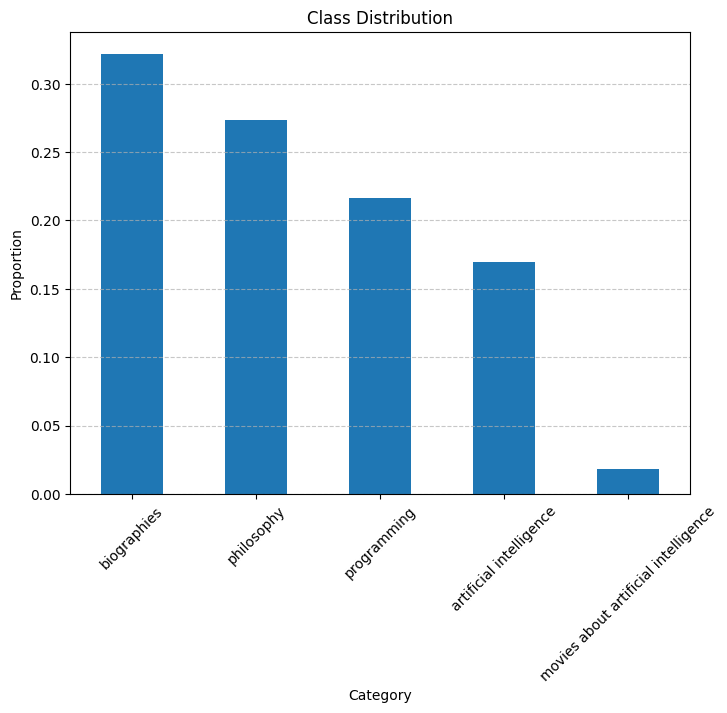

In [ ]:
import matplotlib.pyplot as plt

# Plotting the bar chart
plt.figure(figsize=(8, 6))
category_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### **Using an Oversampling technique to correct the Data Imbalance**

In [ ]:
pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
oversampler = RandomOverSampler()

# Resample the input features and target labels
X_resampled, y_resampled = oversampler.fit_resample(X_dataset, X_dataset['category'])

# Print the class distribution after oversampling
print("Class Distribution after Oversampling:")
print(pd.Series(y_resampled).value_counts(normalize=True))

Class Distribution after Oversampling:
biographies                             0.2
artificial intelligence                 0.2
programming                             0.2
philosophy                              0.2
movies about artificial intelligence    0.2
Name: category, dtype: float64


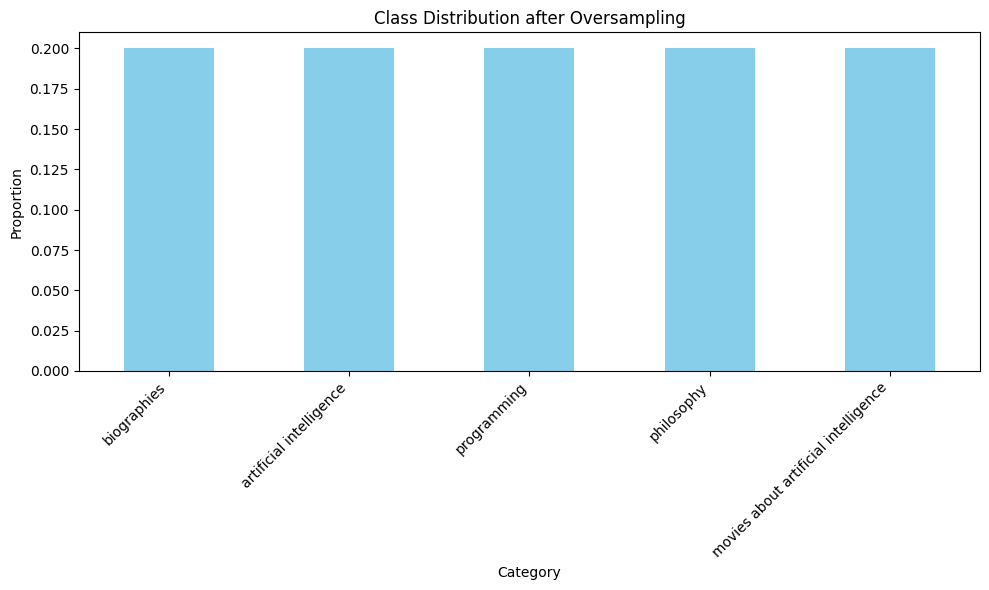

In [ ]:
import matplotlib.pyplot as plt

# Get the class distribution after oversampling
class_distribution = pd.Series(y_resampled).value_counts(normalize=True)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution after Oversampling')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **3. Data splitting and cleaning**

## **1. Data splitting and cleaning**

### **The topic to predict is in the column titled “category”. The input features to use are: “paragraph” and “has_entity”.**


In [ ]:
# Selecting specific columns for features and target
X_features = X_dataset[['has_entity', 'paragraph']]
Y_predict = X_dataset['category']

### **Separating the 'has_entity' column into the three entities:**


In [ ]:
# Split the 'has_entity' column into separate columns based on the presence of each entity
X_features[['ORG', 'PRODUCT', 'PERSON']] = X_features['has_entity'].str.extract(r'ORG_(YES|NO)_PRODUCT_(YES|NO)_PERSON_(YES|NO)_')

# Map 'YES' to 1 and 'NO' to 0
X_features.replace({'YES': 1, 'NO': 0}, inplace=True)


X_features

<ipython-input-51-ee4e7a8edf39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_features[['ORG', 'PRODUCT', 'PERSON']] = X_features['has_entity'].str.extract(r'ORG_(YES|NO)_PRODUCT_(YES|NO)_PERSON_(YES|NO)_')
<ipython-input-51-ee4e7a8edf39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_features[['ORG', 'PRODUCT', 'PERSON']] = X_features['has_entity'].str.extract(r'ORG_(YES|NO)_PRODUCT_(YES|NO)_PERSON_(YES|NO)_')
<ipython-input-51-ee4e7a8edf39>:2: SettingWithCopyWarning: 
A value is trying to be set 

,has_entity,paragraph,ORG,PRODUCT,PERSON
0,ORG_YES_PRODUCT_NO_PERSON_YES_,Ramsay was born in Glasgow on 2 October 1852. ...,1,0,1
1,ORG_YES_PRODUCT_NO_PERSON_NO_,It has been widely estimated for at least the ...,1,0,0
2,ORG_YES_PRODUCT_NO_PERSON_NO_,He went on to win the Royal Medal of the Royal...,1,0,0
3,ORG_NO_PRODUCT_YES_PERSON_NO_,The changes have altered many underlying assum...,0,1,0
4,ORG_YES_PRODUCT_YES_PERSON_YES_,"After these novels were published, Disraeli de...",1,1,1
...,...,...,...,...,...
9342,ORG_YES_PRODUCT_NO_PERSON_YES_,Sir Joseph Dalton Hooker was a British botani...,1,0,1
9343,ORG_YES_PRODUCT_NO_PERSON_YES_,As successful invasions of India generally cam...,1,0,1
9344,ORG_YES_PRODUCT_NO_PERSON_YES_,Hawking was born on 8 January 1942 in Oxford t...,1,0,1
9345,ORG_YES_PRODUCT_NO_PERSON_NO_,More complex tasks can be making custom data e...,1,0,0


In [ ]:
print("\nShape of X_features:", X_features.shape)
print("Shape of Y_predict:", Y_predict.shape)


Shape of X_features: (8850, 5)
Shape of Y_predict: (8850,)


### **Removing any duplicates and splitting both the input features and the labels into a training set and a test set.**

In [ ]:
duplicates_rows = X_dataset.duplicated()
# The result is True for rows that are a duplicate, False for rows that are not a duplicate

print(f'There are {duplicates_rows.sum()} duplicates rows.')

# We have no duplicates here,
# but if we had them, to remove them we'd only keep the rows that are NOT duplicates
X = X_features[~duplicates_rows]
Y = Y_predict[~duplicates_rows]

There are 0 duplicates rows.


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
oversampler = RandomOverSampler()

# Resample the training features and target labels
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_features, Y_predict)

# Split resampled data into training and testing sets
train_dataset, test_dataset, train_labels, test_labels = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, stratify=y_train_resampled, shuffle=True)

## **2. Data quality assessment and Exploratory Data Analysis**

There can be many data quality issues, including invalid/inconsistent features or data points, unnecessary features, missing values, and more.

First, let's inspect the dataset a bit.

### **Checking for missing values within datasets after the data split**

In [ ]:
# Check for missing values in the training data (features)
missing_values_train_data = train_dataset.isnull().sum()
print("Missing Values in Training Data:")
print(missing_values_train_data)

# Check for missing values in the training labels
missing_values_train_labels = train_labels.isnull().sum()
print("\nMissing Values in Training Labels:")
print(missing_values_train_labels)


Missing Values in Training Data:
has_entity    0
paragraph     0
ORG           0
PRODUCT       0
PERSON        0
dtype: int64

Missing Values in Training Labels:
0


### **Dimensions of Dataset and feature names**

In [ ]:
# Training data
# shape of input:
# The number or rows is the number of data points
# The number or columns is the number of features
print(train_dataset.shape)
# shape of output:
# The number or rows is the number of data points (should be the same as before!)
# The number or columns is the number of labels we want to predict
print(train_labels.shape)

(11392, 5)
(11392,)


In [ ]:
# Test data
# shape of input:
# The number or rows is the number of data points
# The number or columns is the number of features (should be the same as for the training!)
print(test_dataset.shape)
# shape of output:
# The number or rows is the number of data points (should be the same as before!)
# The number or columns is the number of labels we want to predict
print(test_labels.shape)

(2848, 5)
(2848,)


In [ ]:
# list of column titles
print(train_dataset.columns)
print(train_labels.name)

Index(['has_entity', 'paragraph', 'ORG', 'PRODUCT', 'PERSON'], dtype='object')
category


In [ ]:
# list of column (field) data types. doing this on the test datasets will give the same results
print(train_dataset.dtypes)
print(train_labels.dtypes)

has_entity    object
paragraph     object
ORG            int64
PRODUCT        int64
PERSON         int64
dtype: object
object


In [ ]:
print(train_labels.index)
print(train_labels.values)


Int64Index([ 5263,  2834,  4407,  9978,  4665,  8207,  4601, 11582,  7008,
             3276,
            ...
             6792,  5225, 10608,  4904,  4056,  3475,  1956,  9913,  1724,
            12664],
           dtype='int64', length=11392)
['philosophy' 'biographies' 'biographies' ... 'artificial intelligence'
 'programming' 'movies about artificial intelligence']


### **Example of randomised dataset:**

In [ ]:
# you can also show a random subset of the data with the function "sample".
# Sometimes it's better to show a sample, so that you get a more varied view of the data
train_dataset.sample(10)

,has_entity,paragraph,ORG,PRODUCT,PERSON
4255,ORG_YES_PRODUCT_NO_PERSON_YES_,Francis Leggatt Chantrey carved a white marble...,1,0,1
12234,ORG_YES_PRODUCT_NO_PERSON_YES_,"In early 1994, the film was in pre-production ...",1,0,1
10884,ORG_NO_PRODUCT_NO_PERSON_YES_,M3GAN grossed $95 million in the United States...,0,0,1
4174,ORG_YES_PRODUCT_NO_PERSON_NO_,"Micro-Soft, by this time Microsoft, ported the...",1,0,0
10598,ORG_YES_PRODUCT_YES_PERSON_YES_,After Celia blames Gemma for Dewey's disappear...,1,1,1
8798,ORG_NO_PRODUCT_NO_PERSON_YES_,"In his Meditations on First Philosophy, Rene D...",0,0,1
295,ORG_YES_PRODUCT_YES_PERSON_NO_,Whereas Apple events are a way to send message...,1,1,0
5780,ORG_YES_PRODUCT_NO_PERSON_YES_,Sir Frederick Grant Banting was a Canadian me...,1,0,1
117,ORG_NO_PRODUCT_NO_PERSON_NO_,"While operations like extend are reversed, how...",0,0,0
7770,ORG_NO_PRODUCT_NO_PERSON_NO_,commands tell the program to look for somethin...,0,0,0


In [ ]:
print(train_labels.head(10))


5263                               philosophy
2834                              biographies
4407                              biographies
9978                  artificial intelligence
4665                               philosophy
8207                               philosophy
4601                              programming
11582    movies about artificial intelligence
7008                  artificial intelligence
3276                              programming
Name: category, dtype: object


### **Categorical features:**


In [ ]:
# let's list all categorical features
categorical_columns = ['has_entity', 'paragraph']

# let's get the categories and their count for each feature
for col in categorical_columns:
    print(f"Categories and number of occurrences for '{col}'")
    print(train_dataset[col].value_counts())
    print()


Categories and number of occurrences for 'has_entity'
ORG_YES_PRODUCT_NO_PERSON_YES_     4009
ORG_NO_PRODUCT_NO_PERSON_NO_       3179
ORG_YES_PRODUCT_NO_PERSON_NO_      1756
ORG_NO_PRODUCT_NO_PERSON_YES_      1473
ORG_YES_PRODUCT_YES_PERSON_YES_     676
ORG_YES_PRODUCT_YES_PERSON_NO_      169
ORG_NO_PRODUCT_YES_PERSON_YES_       88
ORG_NO_PRODUCT_YES_PERSON_NO_        42
Name: has_entity, dtype: int64

Categories and number of occurrences for 'paragraph'
In September 2019, Marvel Studios and Sony Pictures announced that they were set to produce a third film, after an impasse between the two companies during negotiations. Watts returned to direct, from a script by McKenna and Sommers. Holland, Zendaya, Favreau, Tomei, Batalon, and Revolori reprise their roles, while Benedict Cumberbatch and Benedict Wong reprise their MCU roles as Doctor Strange and Wong. Spider-Man: No Way Home features several actors reprising their roles from past Spider-Man films, including Tobey Maguire and Andrew 

# **4. Data Encoding**

### **Dropping 'has_entity' column from training set as the three entity columns exist**

In [ ]:
train_dataset.drop(columns=['has_entity'], inplace=True)

print(train_dataset.head())

                                              paragraph  ORG  PRODUCT  PERSON
5263  In sociology and anthropology, time discipline...    0        0       1
2834  During the development of Darwin's theory, his...    1        0       1
4407  His poems included much natural history, inclu...    0        0       0
9978  The term machine learning was coined in 1959 b...    1        0       1
4665   More generally, it is argued that since it is...    0        0       0


### **Text encoding the target data by tokenising, lowercasing, stopword and punctuation removal and lemmatisation.**

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to preprocess a paragraph
def preprocess_paragraph(paragraph):
    # Tokenize the paragraph
    tokens = word_tokenize(paragraph)
    # Lowercasing and removing non-alphanumeric characters
    tokens = [re.sub(r'[^a-zA-Z]', '', token.lower()) for token in tokens]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join tokens into a single string
    preprocessed_paragraph = ' '.join(lemmatized_tokens)
    return preprocessed_paragraph

# Preprocess each paragraph in batches of 100
preprocessed_paragraphs = []
batch_size = 100
num_batches = len(train_dataset) // batch_size + 1
for i in range(num_batches):
    batch_paragraphs = train_dataset['paragraph'][i * batch_size : (i + 1) * batch_size]
    preprocessed_batch = [preprocess_paragraph(paragraph) for paragraph in batch_paragraphs]
    preprocessed_paragraphs.extend(preprocessed_batch)

# Print the preprocessed paragraphs
for idx, preprocessed_paragraph in enumerate(preprocessed_paragraphs[:5]):
    print(f"{idx}: {preprocessed_paragraph}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


0: sociology anthropology  time discipline general name given social economic rule  convention  custom  expectation governing measurement time  social currency awareness time measurement  people expectation concerning observance custom others  arlie russell hochschild norbert elia written use time sociological perspective 
1: development darwin theory  investigation barnacle showed    segmentation related crustacean  showing diverged relative  darwin owen  homology  comparative anatomy evidence descent  owen demonstrated fossil evidence evolutionary sequence horse  supporting idea development archetype  ordained continuous becoming     gave british association talk impossibility bestial ape  recently discovered gorilla  standing erect transmuted men  owen rule possibility human evolved extinct animal evolutionary mechanism transmutation 
2: poem included much natural history  including statement evolution relatedness form life 
3: term machine learning coined  arthur samuel  ibm employ

### **Text Preprocessing and Average Word Embedding Extraction**

In [ ]:
!pip install -U spacy
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 15.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
import numpy as np

# Load the spaCy model with word vectors
nlp = spacy.load("en_core_web_md")

# Example code to compute average word embeddings
def average_word_embeddings(paragraph):
    doc = nlp(paragraph)
    word_vectors = [token.vector for token in doc if not token.is_stop and token.is_alpha]
    if word_vectors:
        avg_word_embedding = np.mean(word_vectors, axis=0)
    else:
        avg_word_embedding = np.zeros_like(doc.vocab.vectors[0])
    return avg_word_embedding

# Apply the function to compute average word embeddings for each paragraph
train_dataset['avg_embedding'] = train_dataset['paragraph'].apply(average_word_embeddings)

In [ ]:
# Print the shape of the train dataset
print("Shape of the train dataset:", train_dataset.shape)

Shape of the train dataset: (11392, 5)


### **Label encoding: converting the train labels into numerical values**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform categorical labels into numerical values
train_labels_numerical = label_encoder.fit_transform(train_labels)

# Now train_labels_numerical contains numerical representations of the categorical labels

# Print unique numerical labels and their corresponding category labels:
unique_numerical_labels = set(train_labels_numerical)
print("Unique numerical labels and their corresponding category labels:")
for num_label in unique_numerical_labels:
    cat_label = label_encoder.inverse_transform([num_label])[0]
    print(f"Numerical label {num_label}: Category label {cat_label}")

Unique numerical labels and their corresponding category labels:
Numerical label 0: Category label artificial intelligence
Numerical label 1: Category label biographies
Numerical label 2: Category label movies about artificial intelligence
Numerical label 3: Category label philosophy
Numerical label 4: Category label programming


# **5. Testing the data**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and labels (y)
X = train_dataset  # Features
y = train_labels_numerical    # Labels

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the sizes of each set
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

Training set size: 7974
Validation set size: 1709
Test set size: 1709


In [ ]:
# Check for missing values in the labels dataset
missing_values = train_labels.isnull().sum()

# Print the number of missing values for each column
print("Missing Values:\n", missing_values)

Missing Values:
 0


# **TASK 1: Topic Classification**

## **4a. Model building**

### **Converting the word embedding to a numerical value rather than a list**

In [ ]:
X_train['avg_embedding'] = X_train['avg_embedding'].apply(lambda x: np.mean(x))


In [ ]:
X_test['avg_embedding'] = X_test['avg_embedding'].apply(lambda x: np.mean(x))

In [ ]:
print(X_train['avg_embedding'].dtype)
print(X_train['avg_embedding'].head())

float32
13391    0.014954
1893    -0.011755
108      0.031570
11670    0.031624
8325     0.034193
Name: avg_embedding, dtype: float32


In [ ]:
print(X_test.head())

                                               paragraph  ORG  PRODUCT  \
7276    Isaac's friend Sharon Turner, a solicitor, co...    1        0   
3421   Despite having been offered a state funeral by...    0        0   
12632  Discussions for a sequel to Spider-Man: Homeco...    1        0   
11269  On Rotten Tomatoes, WarGames received an appro...    1        0   
3688    Freud wrote an account of 'Anna O'  which was...    1        0   

       PERSON  avg_embedding  
7276        1      -0.006261  
3421        1      -0.018594  
12632       1       0.057091  
11269       1       0.034302  
3688        1       0.083753  


### **Logistic Regression process**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Initialize the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)  # You can adjust max_iter as needed

# Define the numerical features
numerical_features = ['avg_embedding', 'ORG', 'PERSON', 'PRODUCT']

# Define the preprocessing steps for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numerical features
])

# Combine preprocessing steps for all features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', logistic_model)])

# Train the model on the training set
pipeline.fit(X_train, y_train)

# Once trained, you can use this pipeline object to make predictions on new data

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['avg_embedding', 'ORG',
                                                   'PERSON', 'PRODUCT'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

### **Model Hyperparameters: Grid search technique**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their ranges for the grid search
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__max_iter': [100, 500, 1000],          # Maximum number of iterations
    'classifier__solver': ['lbfgs', 'liblinear'],       # Optimization algorithm
    'classifier__penalty': ['l2']                # Type of regularization penalty
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'classifier__C': 0.01, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Test Accuracy: 0.40315974253949677


## **4b. Model evaluation**

### **Confusion Matrix and a Classification Report**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Concatenate the features for the test set
X_test_features = np.column_stack((X_test['avg_embedding'].tolist(), X_test[['ORG', 'PRODUCT', 'PERSON']].values))

# Predict labels for the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print confusion matrix and classification report
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[172  35  38  27  79]
 [ 49 144  64  46  22]
 [ 32  89 182  30  14]
 [108  52  33  63  75]
 [131  10  58  33 123]]

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.49      0.41       351
           1       0.44      0.44      0.44       325
           2       0.49      0.52      0.50       347
           3       0.32      0.19      0.24       331
           4       0.39      0.35      0.37       355

    accuracy                           0.40      1709
   macro avg       0.40      0.40      0.39      1709
weighted avg       0.40      0.40      0.39      1709



### **The Baseline Comparison involves comparing the performance of the developed model with a simple baseline approach, such as random guessing or predicting the majority class.**

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Create a feature matrix with the specified features
X_train_features = X_train[['avg_embedding', 'ORG', 'PERSON', 'PRODUCT']]
X_test_features = X_test[['avg_embedding', 'ORG', 'PERSON', 'PRODUCT']]

# Create a DummyClassifier that predicts the majority class
baseline_model = DummyClassifier(strategy='most_frequent')

# Fit the baseline model on the training data
baseline_model.fit(X_train_features, y_train)

# Predict labels for the test set using the baseline model
baseline_predictions = baseline_model.predict(X_test_features)

# Evaluate the baseline model using a confusion matrix and classification report
baseline_conf_matrix = confusion_matrix(y_test, baseline_predictions)
baseline_class_report = classification_report(y_test, baseline_predictions)

# Print the confusion matrix and classification report
print("Baseline Confusion Matrix:\n", baseline_conf_matrix)
print("\nBaseline Classification Report:\n", baseline_class_report)

Baseline Confusion Matrix:
 [[  0 351   0   0   0]
 [  0 325   0   0   0]
 [  0 347   0   0   0]
 [  0 331   0   0   0]
 [  0 355   0   0   0]]

Baseline Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       351
           1       0.19      1.00      0.32       325
           2       0.00      0.00      0.00       347
           3       0.00      0.00      0.00       331
           4       0.00      0.00      0.00       355

    accuracy                           0.19      1709
   macro avg       0.04      0.20      0.06      1709
weighted avg       0.04      0.19      0.06      1709



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Task 2: text clarity classification prototype.**

## **Importing necessary libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import re
import nltk

!pip install -U spacy
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 18.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## **Downloading CSV file into colab**

In [ ]:
USING_COLAB = True
if USING_COLAB:
  from google.colab import drive
  drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_dataset2 = pd.read_csv('/content/drive/MyDrive/University of Greenwich/Applied Machine Learning/comp1804_coursework_dataset_23-24.csv')

In [ ]:
print("Columns:")
for column in X_dataset2.columns:
    print(column)

Columns:
par_id
paragraph
has_entity
lexicon_count
difficult_words
last_editor_gender
category
text_clarity


# **1. Data preprocessing**

## **Dropping the duplicates**

### **par_id column**

In [ ]:
num_duplicates_par_id = X_dataset2.duplicated(subset=['par_id']).sum()

# Drop duplicates in the 'par_id' column
X_dataset2.drop_duplicates(subset=['par_id'], inplace=True)

# Calculate the total number of duplicates in the 'par_id' column
num_duplicates_par_id = X_dataset2.duplicated(subset=['par_id']).sum()

# Print the total number of duplicates in the 'par_id' column
print(f"Total number of duplicates in 'par_id' column after dropping duplicates: {num_duplicates_par_id}")

Total number of duplicates in 'par_id' column after dropping duplicates: 0


### **paragraph column**

In [ ]:
duplicates_paragraph = X_dataset2[X_dataset2.duplicated(subset=['paragraph'], keep=False)]

# Drop duplicates based on the 'paragraph' column
X_dataset2.drop_duplicates(subset=['paragraph'], keep=False, inplace=True)

# Count the total number of duplicates after dropping
num_duplicates_after = X_dataset2.duplicated(subset=['paragraph'], keep=False).sum()
print(f"Total number of duplicates in 'paragraph' after dropping: {num_duplicates_after}")

Total number of duplicates in 'paragraph' after dropping: 0


## **Dropping missing values in dataframe**

In [ ]:
X_dataset_missing_data = X_dataset2[X_dataset2['has_entity'] == 'data missing']

# Count the number of rows with 'data missing' in the 'has_entity' column
num_data_missing = len(X_dataset_missing_data)

X_dataset2.drop(X_dataset2[X_dataset2['has_entity'] == 'data missing'].index, inplace=True)

# Count the number of rows with 'data missing' in the 'has_entity' column after dropping
num_data_missing_after = (X_dataset2['has_entity'] == 'data missing').sum()
print(f"Total number of 'data missing' values in 'has_entity' after dropping: {num_data_missing_after}")

Total number of 'data missing' values in 'has_entity' after dropping: 0


In [ ]:
# Count the number of missing values in the 'difficult_words' column
num_missing_difficult_words = X_dataset2['difficult_words'].isna().sum()

# Remove rows with missing values only from the 'difficult_words' column
X_dataset2.dropna(subset=['difficult_words'], inplace=True)

# Print the shape of the DataFrame after removing missing data from the 'difficult_words' column
print("Shape of DataFrame after removing missing data from 'difficult_words' column:", X_dataset2.shape)

Shape of DataFrame after removing missing data from 'difficult_words' column: (8850, 8)


In [ ]:
# Convert values in the 'category' column to lowercase
X_dataset2['category'] = X_dataset2['category'].str.lower()

# Print unique items in the 'category' column after conversion
print("Unique items in the 'category' column after converting to lowercase:")
print(X_dataset2['category'].unique())

Unique items in the 'category' column after converting to lowercase:
['biographies' 'artificial intelligence' 'programming' 'philosophy'
 'movies about artificial intelligence']


## **Mode Imputation: Fill missing values with the most frequent label (mode) in the "text_clarity" column.**

In [ ]:
# Fill missing values with the mode
X_dataset2['text_clarity'].fillna(X_dataset2['text_clarity'].mode()[0], inplace=True)

## **Oversampling technique**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Extract features (X) and labels (y)
X = X_dataset2.drop('text_clarity', axis=1)  # Assuming X_dataset contains features other than 'text_clarity'
y = X_dataset2['text_clarity']

# Create RandomOverSampler object
oversampler = RandomOverSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Check class distribution after oversampling
print(pd.Series(y_resampled).value_counts())

clear_enough        8846
not_clear_enough    8846
Name: text_clarity, dtype: int64


In [ ]:
# Replace X_dataset with resampled data
X_dataset2 = pd.concat([X_resampled, y_resampled], axis=1)

# Check the updated class distribution
print(X_dataset2['text_clarity'].value_counts())

clear_enough        8846
not_clear_enough    8846
Name: text_clarity, dtype: int64


## **Creating the two dataframes**

In [ ]:
# DataFrame for paragraph text
paragraph_df = X_dataset2[['par_id', 'paragraph']].copy()

# DataFrame for text clarity labels
text_clarity_df = X_dataset2[['par_id', 'text_clarity']].copy()

# drop any rows with missing values in either dataframe
paragraph_df.dropna(inplace=True)
text_clarity_df.dropna(inplace=True)

# **2. Text enconding and model building**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Tokenization (assuming 'paragraph' contains text data)
paragraphs = paragraph_df['paragraph'].tolist()

# Vectorization (using TF-IDF)
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(paragraphs)

# Extract labels from text_clarity_df
y = text_clarity_df['text_clarity']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

    clear_enough       1.00      1.00      1.00      1735
not_clear_enough       1.00      1.00      1.00      1804

        accuracy                           1.00      3539
       macro avg       1.00      1.00      1.00      3539
    weighted avg       1.00      1.00      1.00      3539



## **Hyperparameter values**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization penalty (L1 or L2)
    'max_iter': [100, 200, 300],  # Maximum number of iterations
    'solver': ['liblinear', 'saga']  # Solver algorithm (for 'l1' penalty)
}
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


## **Baseline vs Model**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Comparison with Majority Class Baseline
majority_class_baseline = len(y_test[y_test == 'clear_enough']) / len(y_test)
print("\nMajority Class Baseline Accuracy:", majority_class_baseline)

# Additional Metrics (if applicable)
# ROC Curve and AUC, etc.


Confusion Matrix:
[[1735    0]
 [   0 1804]]

Classification Report:
                  precision    recall  f1-score   support

    clear_enough       1.00      1.00      1.00      1735
not_clear_enough       1.00      1.00      1.00      1804

        accuracy                           1.00      3539
       macro avg       1.00      1.00      1.00      3539
    weighted avg       1.00      1.00      1.00      3539


Accuracy: 1.0

Majority Class Baseline Accuracy: 0.49025148346990677


In [ ]:
from sklearn.metrics import classification_report

# Majority class baseline predictions (all 'clear_enough')
y_pred_baseline = ['clear_enough'] * len(y_test)

# Generate classification report for the majority class baseline
print("Classification Report for Majority Class Baseline:\n")
print(classification_report(y_test, y_pred_baseline, target_names=['clear_enough', 'not_clear_enough']))

Classification Report for Majority Class Baseline:

                  precision    recall  f1-score   support

    clear_enough       0.49      1.00      0.66      1735
not_clear_enough       0.00      0.00      0.00      1804

        accuracy                           0.49      3539
       macro avg       0.25      0.50      0.33      3539
    weighted avg       0.24      0.49      0.32      3539



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Creating new CSV file**

In [ ]:
import pandas as pd

# Read the original dataset
original_dataset = pd.read_csv('/content/drive/MyDrive/University of Greenwich/Applied Machine Learning/comp1804_coursework_dataset_23-24.csv')

# Assuming you have performed modeling and obtained predicted labels stored in y_pred
# Add predicted labels to the new labels DataFrame (text_clarity_df)
text_clarity_df = pd.DataFrame({'text_clarity': y_pred})

# Drop the old text clarity column from the original dataset
original_dataset.drop('text_clarity', axis=1, inplace=True)

# Merge the datasets based on a common identifier (e.g., paragraph ID)
new_coursework_dataset = pd.merge(original_dataset, text_clarity_df, left_index=True, right_index=True)

# Rename the predicted label column to 'text_clarity' in the merged dataset
new_coursework_dataset.rename(columns={'text_clarity_x': 'text_clarity'}, inplace=True)

# Save the merged dataset to a new CSV file
new_coursework_dataset.to_csv('/content/drive/MyDrive/University of Greenwich/Applied Machine Learning/new_coursework_dataset.csv', index=False)

# Save the merged dataset to a new Excel file
new_coursework_dataset.to_excel('/content/drive/MyDrive/University of Greenwich/Applied Machine Learning/new_coursework_dataset.xlsx', index=False)

# **Labelling process printed.**

In [ ]:
import pandas as pd
import random

# Load the dataset with the updated text clarity column
coursework_dataset = pd.read_csv('/content/drive/MyDrive/University of Greenwich/Applied Machine Learning/new_coursework_dataset.csv')

# Step 1: Generate Labels - Select a random subset of 100 paragraphs
random.seed(42)  # Set random seed for reproducibility
sample_size = 100
random_sample = coursework_dataset.sample(n=sample_size)

# Calculate the number of paragraphs labelled as 'clear_enough' and 'not_clear_enough' in the random sample
clear_enough_count = random_sample['text_clarity'].value_counts().get('clear_enough', 0)
not_clear_enough_count = random_sample['text_clarity'].value_counts().get('not_clear_enough', 0)

# Display label statistics for the random sample
print("Label Statistics for Random Sample:")
print(f"Total Paragraphs in Random Sample: {sample_size}")
print(f"Number of 'Clear Enough' Paragraphs: {clear_enough_count}")
print(f"Number of 'Not Clear Enough' Paragraphs: {not_clear_enough_count}")


Label Statistics for Random Sample:
Total Paragraphs in Random Sample: 100
Number of 'Clear Enough' Paragraphs: 44
Number of 'Not Clear Enough' Paragraphs: 56


In [ ]:
import random

# Select one example of paragraph text from each category
clear_enough_example = random_sample[random_sample['text_clarity'] == 'clear_enough'].iloc[0]['paragraph']
not_clear_enough_example = random_sample[random_sample['text_clarity'] == 'not_clear_enough'].iloc[0]['paragraph']

# Define the certainty levels for the examples
clear_enough_certainty = 'high'  # You can adjust the certainty level as needed
not_clear_enough_certainty = 'medium'  # You can adjust the certainty level as needed

# Print the examples with their certainty levels
print("Examples of Labelled Paragraphs:")
print("1. Clear Enough:")
print(f"Paragraph: \"{clear_enough_example}\"")
print(f"Level of certainty: {clear_enough_certainty}\n")

print("2. Not Clear Enough:")
print(f"Paragraph: \"{not_clear_enough_example}\"")
print(f"Level of certainty: {not_clear_enough_certainty}")

Examples of Labelled Paragraphs:
1. Clear Enough:
Paragraph: "To designate which application is meant to be the target of such a message, AppleScript uses a "tell" construct:"
Level of certainty: high

2. Not Clear Enough:
Paragraph: " A bronze memorial was sculpted by Alfred Stevens, and features two intricate supports: "Truth tearing the tongue out of the mouth of False-hood", and "Valour trampling Cowardice underfoot". Stevens did not live to see it placed in its home under one of the arches of the cathedral.Wellington's casket was decorated with banners which were made for his funeral procession. Originally, there was one from Prussia, which was removed during World War I and never reinstated. In the procession, the "Great Banner" was carried by General Sir James Charles Chatterton of the 4th Dragoon Guards on the orders of Queen Victoria.Most of the book A Biographical Sketch of the Military and Political Career of the Late Duke of Wellington by Weymouth newspaper proprietor Josep